### Image Convolution
Convolution is a simple mathematical operation which is fundamental to many common image processing operators. Convolution provides a way of `multiplying together' two arrays of numbers, generally of different sizes, but of the same dimensionality, to produce a third array of numbers of the same dimensionality.

In [0]:
from __future__ import division 
# change the / operator to mean true division throughout the module.
import numpy as np
from PIL import Image 
# Python Imaging Library
from scipy import misc 
# Used for various utilities that don’t have another home.
from skimage import data 
# skimage is built on the top of NumPy, SciPy, and matplotlib.
from skimage.color import rgb2gray 
# Create an RGB representation of a gray-level image.
import matplotlib.pyplot as plt
%matplotlib inline
import requests
# Requests is a Python HTTP library that makes HTTP requests simpler and more human-friendly.
from io import BytesIO
# Just like what we do with variables, data can be kept as bytes in an in-memory buffer when we use the io module’s Byte IO operations.

Python Imaging Library ===> It supports a wide variety of raster file formats. Over 30 different file formats can be identified and read by the library. The open() function identifies files from their contents, not their names, but the save() method looks at the name to determine which format to use, unless the format is given explicitly.

SciPy ===> SciPy is an Open Source Python-based library, which is used in mathematics, scientific computing, Engineering, and technical computing. SciPy is built in top of the NumPy. SciPy is a fully-featured version of Linear Algebra while Numpy contains only a few features.Most new Data Science features are available in Scipy rather than Numpy.
<ul>
File input/output - scipy.io <br>
Special Function - scipy.special <br>
Linear Algebra Operation - scipy.linalg <br>
Interpolation - scipy.interpolate <br>
Optimization and fit - scipy.optimize <br>
Statistics and random numbers - scipy.stats <br>
Numerical Integration - scipy.integrate <br>
Fast Fourier transforms - scipy.fftpack <br>
Signal Processing - scipy.signal <br>
Image manipulation – scipy.ndimage
</ul>

# Import the image

In [0]:
response = requests.get('https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTAHCp2ppBbfcPk9S5nE8gFFsZpDh0Exv9qUKXjehk_QszZHsV_pw&s')
# The requests.get() method sends a GET request to the specified url.

In [0]:
input_img_arr = np.array(Image.open(BytesIO(response.content)))
# Opens and saves the content from Response object, which is in bytes.

# First let’s see the Image.




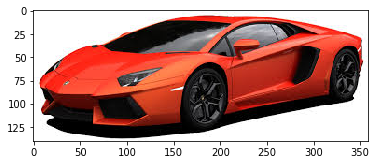

In [0]:
plt.imshow(input_img_arr)

The shape of the ndarray shows that it is a three-layered matrix. The first two numbers here are length and width, and the third number (i.e. 3) is for three layers: three colors. So, if we calculate the size of an RGB image, the total size will be counted as height x width x 3

In [0]:
print(input_img_arr.shape)
print(np.array_equal(input_img_arr[:, :, 0], input_img_arr[:, :, 1]))
print(np.array_equal(input_img_arr[:, :, 1], input_img_arr[:, :, 2]))

(140, 359, 3)
False
False


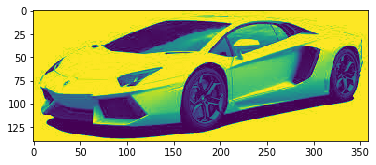

In [0]:
plt.imshow(input_img_arr[:, :, 0])

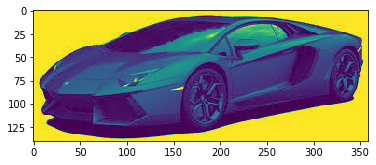

In [0]:
plt.imshow(input_img_arr[:, :, 1])

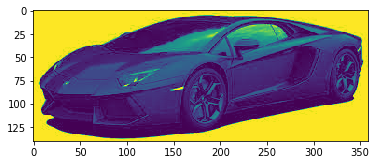

In [0]:
plt.imshow(input_img_arr[:, :, 2])

In [0]:
input_img_arr = input_img_arr[:, :, 0]

In [0]:
input_img_arr[:300, :400]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

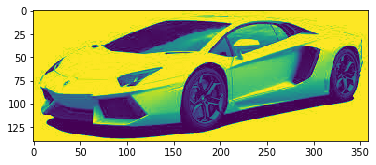

In [0]:
plt.imshow(input_img_arr[:300, :400])

# Convolution with 2-D Kernels


How Convolution works?
https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif

In [0]:
padded_array = np.pad(input_img_arr, (1, 1), 'constant')
kernel = np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]])
output_array = np.zeros(input_img_arr.shape)

In [0]:
for i in range(padded_array.shape[0]-2):
    for j in range(padded_array.shape[1]-2):
        temp_array = padded_array[i:i+3, j:j+3]
        output_array[i, j] = np.sum(temp_array*kernel)

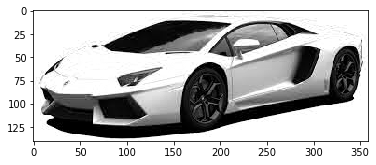

In [0]:
plt.imshow(output_array, cmap = plt.get_cmap('gray'))

# Standard Convolution

In [0]:
# The function that returns values from 0 to 255. If less than 0, it returns 0 and if more than 255 it returns 255.
def squash_pixel_value(value):
    if value < 0:
        return 0
    elif value < 255:
        return value
    else:
        return 255

In [0]:
def conv_2d_kernel(image_array_2d, kernel, squash_pixels = True):
    padded_array = np.pad(image_array_2d, (1, 1), 'constant')
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    transformed_array = np.zeros(image_array_2d.shape)
 
    for i in range(padded_array.shape[0] - kernel_width + 1):
        for j in range(padded_array.shape[1] - kernel_height + 1):
            temp_array = padded_array[i:i+kernel_width, j:j+kernel_height]
            #print temp_array.shape
            if squash_pixels:
                transformed_array[i, j] = squash_pixel_value(np.sum(temp_array*kernel))
            else:
                transformed_array[i, j] = np.sum(temp_array*kernel)
    return transformed_array

# Line detection
With image convolutions, you can easily detect lines. Here are four convolutions to detect horizontal, vertical and lines at 45 degrees:

![alt text](https://aishack.in/static/img/tut/conv-line-detection.jpg)


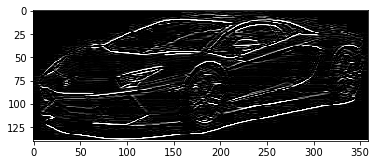

In [0]:
horizontal_kernel = np.array([[-1, -1, -1],
                          [2, 2, 2],
                          [-1, -1, -1]])

transf_horizontal = conv_2d_kernel(input_img_arr, kernel = horizontal_kernel)

plt.imshow(transf_horizontal, cmap = plt.get_cmap('gray'))

# Detect Vertical lines, lines at 45 degree and 135 degree in your image using convoulution

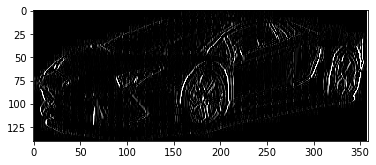

In [0]:
vertical_kernel = np.array([[-1, 2, -1],
                          [-1, 2, -1],
                          [-1, 2, -1]])

transf_vertical = conv_2d_kernel(input_img_arr, kernel = vertical_kernel)

plt.imshow(transf_vertical, cmap = plt.get_cmap('gray'))

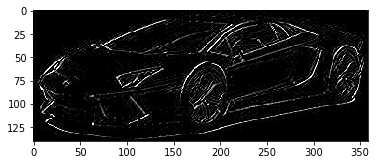

In [0]:
forty_five_kernel = np.array([[-1, -1, 2],
                          [-1, 2, -1],
                          [2, -1, -1]])

transf_forty_five = conv_2d_kernel(input_img_arr, kernel = forty_five_kernel)

plt.imshow(transf_forty_five, cmap = plt.get_cmap('gray'))

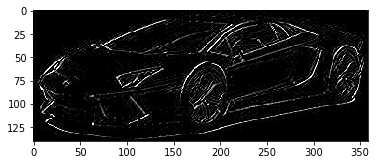

In [0]:
one_three_five_kernel = np.array([[-1, -1, 2],
                          [-1, 2, -1],
                          [2, -1, -1]])

transf_one_three_five = conv_2d_kernel(input_img_arr, kernel = one_three_five_kernel)

plt.imshow(transf_one_three_five, cmap = plt.get_cmap('gray'))

# Edge Detection

Apply the following kernals to your image and plot the output

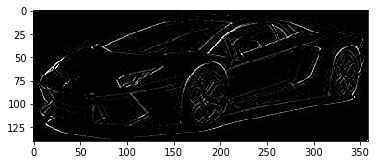

In [0]:
edge_kernel_1 = np.array([[1, 0, -1],
                          [0, 0, 0],
                          [-1, 0, 1]])
transf_kernel_1 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_1)

plt.imshow(transf_kernel_1, cmap = plt.get_cmap('gray'))

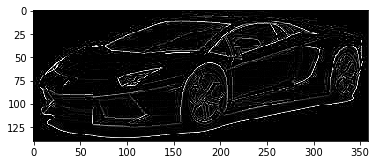

In [0]:
edge_kernel_2 = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])

transf_kernel_2 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_2)

plt.imshow(transf_kernel_2, cmap = plt.get_cmap('gray'))

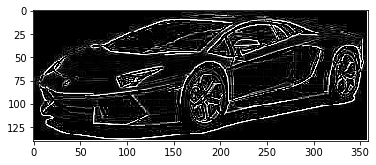

In [0]:
edge_kernel_3 = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

transf_kernel_3 = conv_2d_kernel(input_img_arr, kernel = edge_kernel_3)

plt.imshow(transf_kernel_3, cmap = plt.get_cmap('gray'))